## Aggregations: Min, Max, and Everything In Between

### Summing the Values in an Array

As a quick example, consider computing the sum of all values in an array.
Python itself can do this using the built-in ``sum`` function:

In [ ]:
import numpy as np

In [ ]:
L = np.random.random(100)
sum(L)

The syntax is quite similar to that of NumPy's ``sum`` function, and the result is the same in the simplest case:

In [ ]:
np.sum(L)

However, because it executes the operation in compiled code, NumPy's version of the operation is computed much more quickly:

In [ ]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

Be careful, though: the ``sum`` function and the ``np.sum`` function are not identical, which can sometimes lead to confusion!
In particular, their optional arguments have different meanings, and ``np.sum`` is aware of multiple array dimensions, as we will see in the following section.

### Minimum and Maximum

Similarly, Python has built-in ``min`` and ``max`` functions, used to find the minimum value and maximum value of any given array:

In [ ]:
min(big_array), max(big_array)

NumPy's corresponding functions have similar syntax, and again operate much more quickly:

In [ ]:
np.min(big_array), np.max(big_array)

In [ ]:
%timeit min(big_array)
%timeit np.min(big_array)

For ``min``, ``max``, ``sum``, and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself:

In [ ]:
print(big_array.min(), big_array.max(), big_array.sum())

Whenever possible, make sure that you are using the NumPy version of these aggregates when operating on NumPy arrays!

### Multi dimensional aggregates



In [ ]:
M = np.random.random((3, 4))
print(M)

By default, each NumPy aggregation function will return the aggregate over the entire array:

In [ ]:
M.sum()

Aggregation functions take an additional argument specifying the *axis* along which the aggregate is computed. For example, we can find the minimum value within each column by specifying ``axis=0``:

In [ ]:
M.min(axis=0)

The function returns four values, corresponding to the four columns of numbers.

Similarly, we can find the maximum value within each row:

In [ ]:
M.max(axis=1)

The way the axis is specified here can be confusing to users coming from other languages.
The ``axis`` keyword specifies the **dimension of the array that will be collapsed**, rather than the dimension that will be returned.
So specifying ``axis=0`` means that the first axis will be collapsed: for two-dimensional arrays, this means that values within each column will be aggregated.

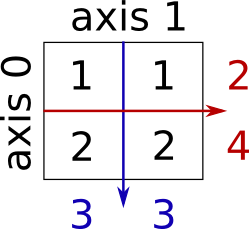

In [ ]:
x = np.array([[1, 1], [2, 2]])
x.sum(axis=0)

In [ ]:
x[:, 0].sum(), x[:, 1].sum()

In [ ]:
x.sum(axis=1)

In [ ]:
x[0, :].sum(), x[1, :].sum()

In [ ]:
# Same idea in higher dimensions:
x = np.random.rand(2, 2, 2)
x.sum(axis=2)[0, 1]     

x[0, 1, :].sum()

In [ ]:
x = np.random.rand(2, 3, 4)
x.sum(axis=1).shape

### Other aggregation functions

NumPy provides many other aggregation functions, but we won't discuss them in detail here.
Additionally, most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point ``NaN`` value (for a fuller discussion of missing data).
Some of these ``NaN``-safe functions were not added until NumPy 1.8, so they will not be available in older NumPy versions.

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |


In [ ]:
a = np.array([1,2,np.NaN])

In [ ]:
a

In [ ]:
a.dtype

In [ ]:
a.sum()

In [ ]:
np.nansum(a)